# Download Dataset


In [21]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mohamedashrafhassan","key":"440626cbc0164beddf12bd97fcdbec91"}'}

In [22]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
!kaggle datasets download -d thomasnibb/amsterdam-house-price-prediction

amsterdam-house-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
!unzip /content/amsterdam-house-price-prediction.zip

Archive:  /content/amsterdam-house-price-prediction.zip
replace HousingPrices-Amsterdam-August-2021.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: HousingPrices-Amsterdam-August-2021.csv  


# Porcessing


## Importing Libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

## Data Exploration
and some visualiztion



In [26]:

# Load the dataset
df = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')


In [27]:

# Print the head of the dataset
print(df.head())


   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  


In [28]:

# Check for missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB
None


<Axes: xlabel='Price', ylabel='Count'>

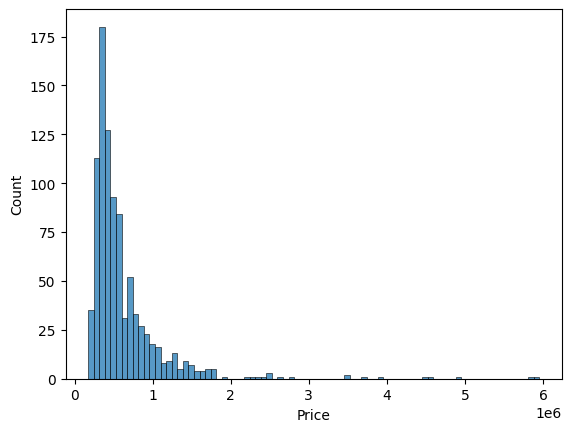

In [29]:


# Create a histogram of house prices
sns.histplot(df['Price'])

<ipython-input-30-8600911534f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

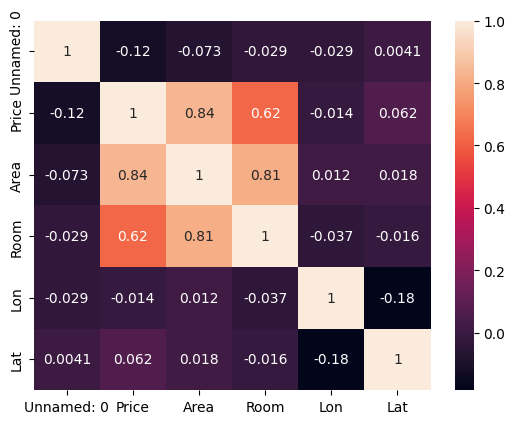

In [30]:


# Create a correlation matrix of all features
corr_matrix = df.corr()

# Display the correlation matrix
sns.heatmap(corr_matrix, annot=True)

## Data Preprocessing

In [31]:
# Replace missing values with the median value for each feature
df.fillna(df.median(), inplace=True)

<ipython-input-31-d43b691e7336>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


## Feature Selection

In [33]:
# Choose features based on correlation matrix or feature importance techniques

features = ['Area', 'Lon', 'Lat',  'Room']

# Create a new dataframe with only the selected features

X = df[features]

# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Price'], test_size=0.25, random_state=42)


## Model Selection

In [34]:
# Here, we are using Random Forest Regression
model = RandomForestRegressor()


In [35]:
# Train the model on the training data

model.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
# Evaluate the model on the test data

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 138349877269.6758
R-squared: 0.6720125237807271


In [37]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("Ridge Regression", Ridge(alpha=0.1)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=2)),
]

In [38]:
# Initialize lists to store model performance scores
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

In [39]:
# Perform cross-validation for each model
for name, model in models:
    kf = KFold(n_splits=3,shuffle=True,random_state=42)
    mae = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2').mean()
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

In [40]:
# Create a DataFrame to compare model performance
results_df = pd.DataFrame({
    "Model": [name for name, _ in models],
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "R2": r2_scores
})

In [41]:
max = 0
for i in range(len(results_df['R2'])):
    if i==(len(results_df['R2']))-1:
        if results_df['R2'][i]>results_df['R2'][max]:
            max = i
    else:
        if results_df['R2'][i]>results_df['R2'][i+1]:
               max= i
print(f"Best Model : {results_df['Model'][max]} with accuracy : {results_df['R2'][max]}")

Best Model : Gradient Boosting with accuracy : 0.6746491462581403


In [42]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [43]:
#Calculate training accuracy
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

In [44]:
predicted_price = model.predict(X_test)


In [45]:
# Calculate testing scores
test_mae = mean_absolute_error(y_test, predicted_price)
test_mse = mean_squared_error(y_test, predicted_price)
test_rmse = mean_squared_error(y_test, predicted_price, squared=False)
test_r2 = r2_score(y_test, predicted_price)

In [46]:
print(f' \t SUMMARY \n Training accuracy : {train_r2} \n Testing accuracy : {test_r2}')


 	 SUMMARY 
 Training accuracy : 0.9528126217176875 
 Testing accuracy : 0.6734416223961059
